## Questions: 
1. What are the accuracies of the Models we ran? </br>
2. What method is best for our multi-class data > one vs one OR one vs all? </br>
3. What weather was the hardest to classify? </br>
4. Are there similar weathers so that it was harder for the models to classify? if so, what methods helped? </br>
5. Can one classify few classes to one class, and get better results? </br>
6. Does PCA help? </br>

## Models: 
1.	KNN </br>
2.	SVM </br>
3.	Adaboost </br>
4.	Decision trees </br>
5.	perceptron </br>

## difficulties throughout the project:
1. Imbalanced data
2. Null files

The methods we tried:
1. Dimension reduction - PCA </br>
2. gray scale / RGB </br>
3. one vs one / one vs all </br>

In [1]:
#libraries
import numpy as np 
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

#preproccesing
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report,f1_score

#models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import Perceptron

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
path = r'C:\Users\sandl\\Downloads\dataset'
# path = r'C:\Users\talia\MachineLearning\dataset'

### Functions

In [3]:
def load(path):
    images = [path + i for i in os.listdir(path)]
    im = cv2.imread(images[0])
    if im is not None:
        im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        img = im
        plt.imshow(img)
    else:
        print("Failed to load image:", images[0])
    return images

def toList(images_list, labels_list, images, orig_label):
    for index,i in enumerate(images):
        if index > 800:
            break   
        label = orig_label
        if orig_label in ['frost','snow','rain']:
            label = 'winter'
            if index > 265:
                break
        img = cv2.imread(i)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (50,50))
            images_list.append(pd.Series(img.flatten())) #used flatten method
            labels_list.append(label)
            if label in ['rainbow']:
                img = cv2.flip(img,1)
                images_list.append(pd.Series(img.flatten())) #used flatten method
                labels_list.append(label)
                if index == 0:
                    plt.imshow(img)


## Loading Data

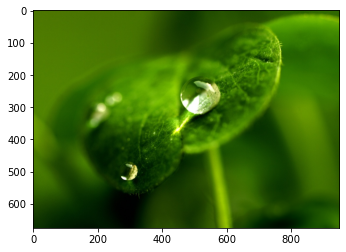

In [4]:
#dew
dew_images = load(path+'\dew/')

In [5]:
images = []
labels = []
 
toList(images, labels, dew_images, 'dew')

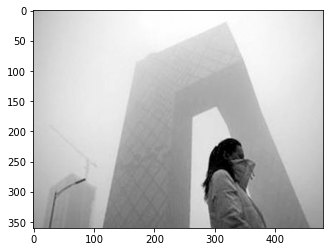

In [6]:
#fogsmog
fogsmog_images = load(path+'\\fogsmog/')

In [7]:
toList(images, labels, fogsmog_images, 'fogsmog')

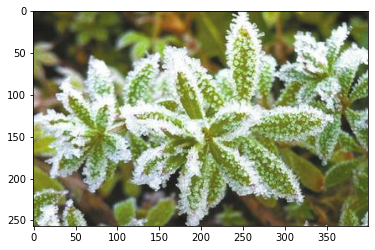

In [8]:
#frost
frost_images = load(path+'\\frost/')

In [9]:
toList(images, labels, frost_images, 'frost')

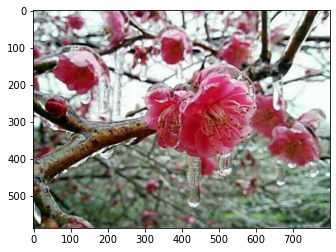

In [10]:
#glaze
glaze_images = load(path+'\glaze/')

In [11]:
toList(images, labels, glaze_images, 'glaze')

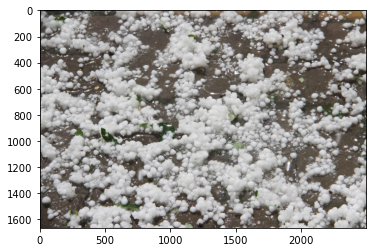

In [12]:
#hail
hail_images = load(path+'\hail/')

In [13]:
toList(images, labels, hail_images, 'hail')

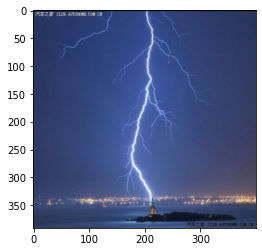

In [14]:
#lightning
lightning_images = load(path+'\lightning/')

In [15]:
toList(images, labels, lightning_images, 'lightning')

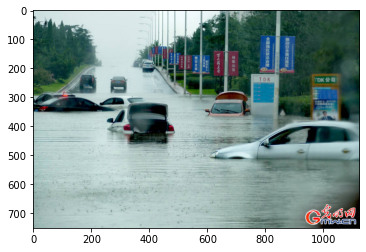

In [16]:
#rain
rain_images = load(path+'\\rain/')

In [17]:
toList(images, labels, rain_images, 'rain')

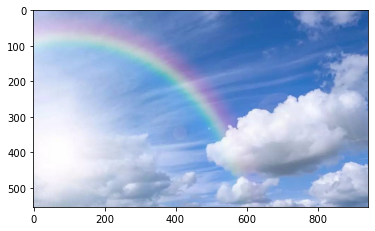

In [18]:
#rainbow
rainbow_images = load(path+'\\rainbow/')

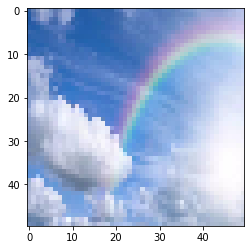

In [19]:
toList(images, labels, rainbow_images, 'rainbow')

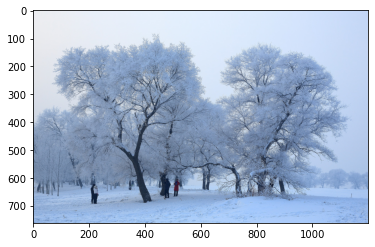

In [20]:
#rime
rime_images = load(path+'\\rime/')

In [21]:
toList(images, labels, rime_images, 'rime')

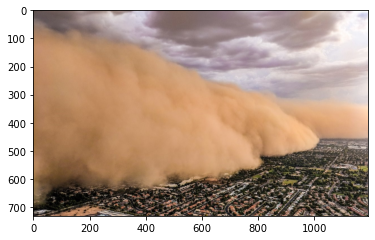

In [22]:
#sandstorm
sandstorm_images = load(path+'\sandstorm/')

In [23]:
toList(images, labels, sandstorm_images, 'sandstorm')

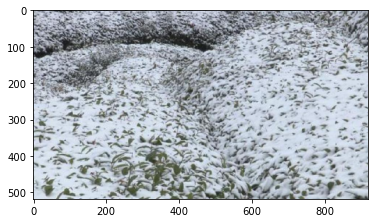

In [24]:
#snow
snow_images = load(path+'\snow/')

In [25]:
toList(images, labels, snow_images, 'snow')

## Visualization

In [26]:
images_df = pd.DataFrame(images)
images_df

,0,1,2,3,4,5,6,7,8,9,...,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499
0,76,119,1,76,116,1,75,118,0,77,...,1,22,79,0,34,90,0,54,112,0
1,39,51,29,47,59,35,44,56,32,38,...,75,75,104,70,84,111,76,66,96,60
2,38,58,8,78,106,45,54,77,30,34,...,5,1,0,5,1,0,5,1,0,5
3,0,16,0,0,21,0,0,26,1,0,...,2,1,51,2,1,51,2,2,52,1
4,213,227,228,201,217,217,217,228,230,216,...,228,210,220,223,196,210,210,191,204,212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5855,62,75,71,64,74,75,60,66,66,168,...,212,73,63,54,139,122,112,140,121,112
5856,167,161,155,182,177,167,191,191,188,193,...,196,168,166,165,189,149,153,119,121,117
5857,74,102,123,67,98,121,77,116,142,78,...,201,218,218,213,208,208,204,211,210,205
5858,47,99,183,47,99,183,48,100,184,48,...,130,179,182,197,207,208,214,232,229,241


In [27]:
labels_df = pd.DataFrame(labels, columns=['labels'])
labels_df

,labels
0,dew
1,dew
2,dew
3,dew
4,dew
...,...
5855,winter
5856,winter
5857,winter
5858,winter


In [28]:
target_counts = labels_df['labels'].value_counts()
target_counts

rime         801
fogsmog      800
winter       798
dew          698
sandstorm    692
glaze        639
hail         591
rainbow      464
lightning    377
Name: labels, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'dew'),
  Text(1, 0, 'fogsmog'),
  Text(2, 0, 'winter'),
  Text(3, 0, 'glaze'),
  Text(4, 0, 'hail'),
  Text(5, 0, 'lightning'),
  Text(6, 0, 'rainbow'),
  Text(7, 0, 'rime'),
  Text(8, 0, 'sandstorm')])

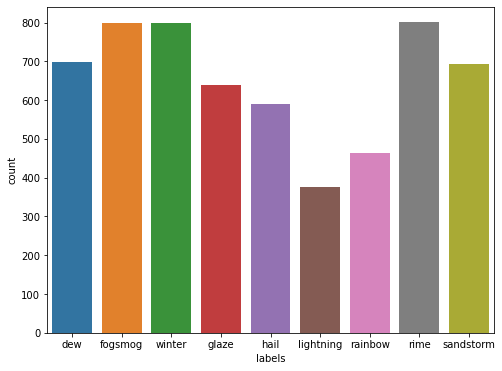

In [29]:
l = labels_df["labels"]
plt.figure(figsize = (8,6))
sns.countplot(l)
plt.xticks()

In [30]:
data_df = pd.concat([images_df, labels_df], axis=1)
data_df

,0,1,2,3,4,5,6,7,8,9,...,7491,7492,7493,7494,7495,7496,7497,7498,7499,labels
0,76,119,1,76,116,1,75,118,0,77,...,22,79,0,34,90,0,54,112,0,dew
1,39,51,29,47,59,35,44,56,32,38,...,75,104,70,84,111,76,66,96,60,dew
2,38,58,8,78,106,45,54,77,30,34,...,1,0,5,1,0,5,1,0,5,dew
3,0,16,0,0,21,0,0,26,1,0,...,1,51,2,1,51,2,2,52,1,dew
4,213,227,228,201,217,217,217,228,230,216,...,210,220,223,196,210,210,191,204,212,dew
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5855,62,75,71,64,74,75,60,66,66,168,...,73,63,54,139,122,112,140,121,112,winter
5856,167,161,155,182,177,167,191,191,188,193,...,168,166,165,189,149,153,119,121,117,winter
5857,74,102,123,67,98,121,77,116,142,78,...,218,218,213,208,208,204,211,210,205,winter
5858,47,99,183,47,99,183,48,100,184,48,...,179,182,197,207,208,214,232,229,241,winter


## preprocessing of data

In [31]:
# Split the training dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(images_df, labels_df, test_size=0.3, random_state=42)
# Split the test dataset into test and validation sets
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
print("Number of samples in the train set: ", len(X_train))
print("Number of samples in the test set: ", len(X_test))
print("Number of samples in the validation set: ", len(X_valid))

Number of samples in the train set:  4102
Number of samples in the test set:  879
Number of samples in the validation set:  879


In [32]:
X_train = X_train.astype(np.float32)
X_valid = X_valid.astype(np.float32)
X_test = X_test.astype(np.float32)

In [33]:
# Normalization
X_train /=255.
X_valid /=255.
X_test /=255.

### PCA

In [34]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)

In [35]:
pca = PCA(n_components = 0.97)

X_train_reduced = pca.fit_transform(X_train)
X_val_reduced = pca.transform(X_valid)
X_test_reduced = pca.transform(X_test)

In [36]:
pca.n_components_

965

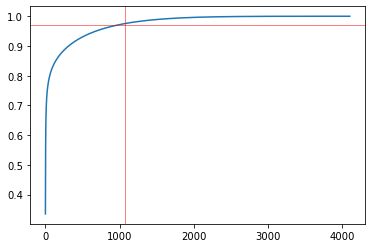

In [37]:
plt.plot(cumsum)
plt.axhline(y=0.97, linewidth=0.5, color='r');
plt.axvline(x=1077, linewidth=0.5, color='r');

# Modeling

In [38]:
X_train_PCA = pd.DataFrame(X_train_reduced)
X_val_PCA = pd.DataFrame(X_val_reduced)
X_test_PCA = pd.DataFrame(X_test_reduced)

### KNN

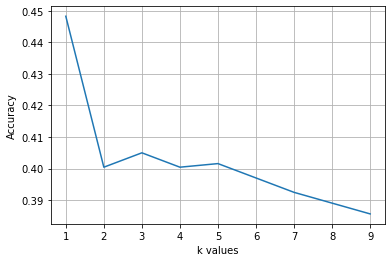

In [39]:
score_list = []
for each in range(1, 10):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(X_train, y_train)
    score_list.append(knn2.score(X_valid, y_valid))
plt.plot(range(1,10), score_list)
plt.xlabel("k values")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [40]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_valid)

In [41]:
knn_score = metrics.accuracy_score(y_valid, knn_pred)*100
print("KNN Algo Result : ",knn_score)

KNN Algo Result :  44.82366325369738


              precision    recall  f1-score   support

         dew       0.94      0.48      0.63       125
     fogsmog       0.28      0.88      0.42       123
       glaze       0.89      0.39      0.54        85
        hail       0.78      0.18      0.30        76
   lightning       0.48      0.55      0.51        55
     rainbow       0.34      0.50      0.40        76
        rime       0.70      0.23      0.34       114
   sandstorm       0.53      0.66      0.59       110
      winter       0.60      0.10      0.18       115

    accuracy                           0.45       879
   macro avg       0.62      0.44      0.44       879
weighted avg       0.62      0.45      0.44       879



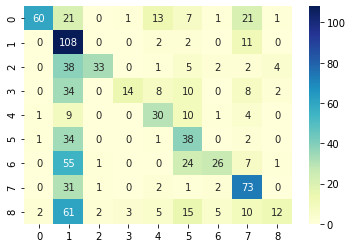

In [42]:
con_mat = confusion_matrix(y_valid, knn_pred)
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='g',cmap="YlGnBu")
print(classification_report(y_valid, knn_pred))

PCA

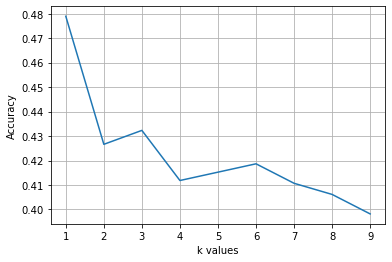

In [43]:
score_list = []
for each in range(1, 10):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(X_train_PCA, y_train)
    score_list.append(knn2.score(X_val_PCA, y_valid))
plt.plot(range(1,10), score_list)
plt.xlabel("k values")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [44]:
knn_PCA = KNeighborsClassifier(n_neighbors = 1)
knn_PCA.fit(X_train_PCA, y_train)
knn_pred_PCA = knn_PCA.predict(X_val_PCA)

In [45]:
knn_score_PCA = metrics.accuracy_score(y_valid, knn_pred_PCA)*100
print("KNN Algo with PCA Result : ",knn_score_PCA)

KNN Algo with PCA Result :  47.89533560864619


              precision    recall  f1-score   support

         dew       0.94      0.54      0.68       125
     fogsmog       0.29      0.88      0.44       123
       glaze       0.87      0.39      0.54        85
        hail       0.83      0.20      0.32        76
   lightning       0.51      0.60      0.55        55
     rainbow       0.39      0.55      0.46        76
        rime       0.67      0.27      0.39       114
   sandstorm       0.55      0.69      0.62       110
      winter       0.59      0.14      0.23       115

    accuracy                           0.48       879
   macro avg       0.63      0.47      0.47       879
weighted avg       0.63      0.48      0.47       879



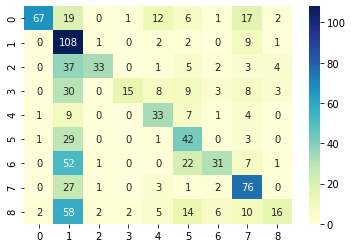

In [46]:
con_mat = confusion_matrix(y_valid, knn_pred_PCA)
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='g',cmap="YlGnBu")
print(classification_report(y_valid, knn_pred_PCA))

Why KNN model is weak for our data?

1. Environment importance: The KNN model calculates the distance between the features which are the pixels in each image, by doing this __it completely ignores the neighborhood__ so it loses a lot of information, and this leads to weak results.  

2. Sensitivity to irrelevant features: KNN gives __all features the same weight__ when calculating distances between the pixels. In images, there can be irrelevant or noisy pixels that make the classification harder.

3. Unequal feature importance: __Not all pixels in images may have the same information importance__ for classification. KNN treats all features equally without considering their importance.

### SVM

In [47]:
svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_valid)

In [48]:
svm_score = metrics.accuracy_score(y_valid, svm_pred)*100
print("SVM Algo Result : ",svm_score)

SVM Algo Result :  67.80432309442548


              precision    recall  f1-score   support

         dew       0.89      0.74      0.81       125
     fogsmog       0.68      0.84      0.75       123
       glaze       0.61      0.58      0.59        85
        hail       0.59      0.46      0.52        76
   lightning       0.65      0.85      0.74        55
     rainbow       0.76      0.50      0.60        76
        rime       0.64      0.68      0.66       114
   sandstorm       0.86      0.76      0.81       110
      winter       0.49      0.61      0.54       115

    accuracy                           0.68       879
   macro avg       0.69      0.67      0.67       879
weighted avg       0.69      0.68      0.68       879



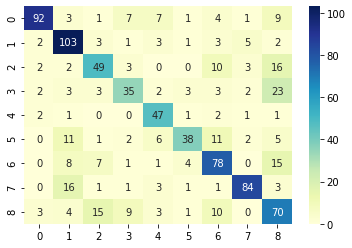

In [49]:
con_mat = confusion_matrix(y_valid, svm_pred)
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='g',cmap="YlGnBu")
print(classification_report(y_valid, svm_pred))

PCA

In [50]:
svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm.fit(X_train_PCA, y_train)
svm_pred = svm.predict(X_val_PCA)

In [51]:
svm_score_PCA = metrics.accuracy_score(y_valid, svm_pred)*100
print("SVM Algo with PCA Result : ",svm_score_PCA)

SVM Algo with PCA Result :  58.703071672354945


              precision    recall  f1-score   support

         dew       0.87      0.57      0.69       125
     fogsmog       0.56      0.91      0.70       123
       glaze       1.00      0.35      0.52        85
        hail       0.82      0.24      0.37        76
   lightning       0.71      0.76      0.74        55
     rainbow       0.70      0.57      0.63        76
        rime       0.42      0.54      0.48       114
   sandstorm       0.77      0.65      0.70       110
      winter       0.36      0.58      0.44       115

    accuracy                           0.59       879
   macro avg       0.69      0.57      0.58       879
weighted avg       0.67      0.59      0.59       879



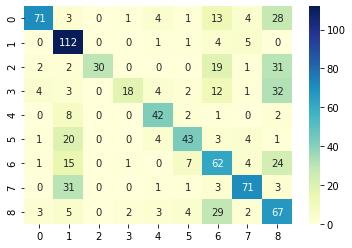

In [52]:
con_mat = confusion_matrix(y_valid, svm_pred)
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='g',cmap="YlGnBu")
print(classification_report(y_valid, svm_pred))

Why SVM model is weak for our data?

The SVM tries to separate the data by using hyperplane, while the images have many dimensions which makes the separate problem more complex. 

### AdaBoost

In [53]:
adac = AdaBoostClassifier(Perceptron(tol=1e-3, random_state=0), n_estimators=12, algorithm="SAMME", learning_rate=0.1)
adac.fit(X_train, y_train)
adac_pred = adac.predict(X_valid)

In [54]:
adac_score = adac.score(X_valid, y_valid)*100
print("AdaBoost Classifier score: ", adac_score)

AdaBoost Classifier score:  56.20022753128555


              precision    recall  f1-score   support

         dew       0.87      0.64      0.74       125
     fogsmog       0.43      0.89      0.58       123
       glaze       0.47      0.41      0.44        85
        hail       0.51      0.43      0.47        76
   lightning       0.67      0.67      0.67        55
     rainbow       0.70      0.53      0.60        76
        rime       0.50      0.47      0.48       114
   sandstorm       0.76      0.59      0.66       110
      winter       0.46      0.36      0.40       115

    accuracy                           0.56       879
   macro avg       0.60      0.55      0.56       879
weighted avg       0.60      0.56      0.56       879



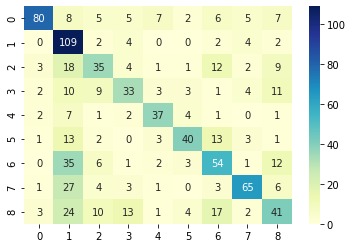

In [55]:
con_mat = confusion_matrix(y_valid, adac_pred)
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='g',cmap="YlGnBu")
print(classification_report(y_valid, adac_pred))

PCA

In [56]:
adac = AdaBoostClassifier(Perceptron(tol=1e-3, random_state=0), n_estimators=20, algorithm="SAMME", learning_rate=0.1)
adac.fit(X_train_PCA, y_train)
adac_pred = adac.predict(X_val_PCA)

In [57]:
adac_score_PCA = adac.score(X_val_PCA, y_valid)*100
print("AdaBoost Classifier with PCA score: ", adac_score_PCA)

AdaBoost Classifier with PCA score:  58.36177474402731


              precision    recall  f1-score   support

         dew       0.75      0.69      0.72       125
     fogsmog       0.59      0.77      0.67       123
       glaze       0.55      0.41      0.47        85
        hail       0.49      0.39      0.44        76
   lightning       0.60      0.84      0.70        55
     rainbow       0.61      0.55      0.58        76
        rime       0.56      0.49      0.52       114
   sandstorm       0.65      0.69      0.67       110
      winter       0.40      0.41      0.41       115

    accuracy                           0.58       879
   macro avg       0.58      0.58      0.57       879
weighted avg       0.58      0.58      0.58       879



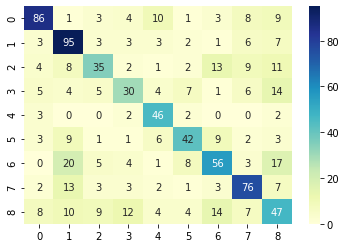

In [58]:
con_mat = confusion_matrix(y_valid, adac_pred)
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='g',cmap="YlGnBu")
print(classification_report(y_valid, adac_pred))

Why AdaBoost model is weak for our data?

AdaBoost is a sequential algorithm. This means that it builds models one at a time, and each model depends on the previous models. If the __first few models are not very accurate, they can make it difficult for AdaBoost to learn accurate models later on.__

### Perceptron

In [59]:
per = Perceptron(tol=1e-3, random_state=0)
per.fit(X_train, y_train)
per_pred = per.predict(X_valid)

In [60]:
per_score =  per.score(X_train, y_train)*100
print("Perceptron Classifier score: ", per_score)

Perceptron Classifier score:  68.43003412969283


              precision    recall  f1-score   support

         dew       0.91      0.51      0.66       125
     fogsmog       0.20      0.01      0.02       123
       glaze       0.33      0.51      0.40        85
        hail       0.61      0.29      0.39        76
   lightning       0.78      0.58      0.67        55
     rainbow       0.58      0.18      0.28        76
        rime       0.59      0.31      0.40       114
   sandstorm       0.26      0.96      0.41       110
      winter       0.42      0.38      0.40       115

    accuracy                           0.41       879
   macro avg       0.52      0.41      0.40       879
weighted avg       0.51      0.41      0.39       879



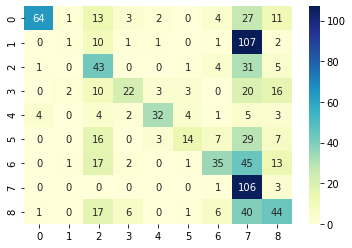

In [61]:
con_mat = confusion_matrix(y_valid, per_pred)
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='g',cmap="YlGnBu")
print(classification_report(y_valid, per_pred))

### Strongest model
__The answer for question 3__: The hardest class to classify was 2, which is 'frost'. We can also see that it was hard to classify the 6 class, which is 'rain'. In both classes the model confused a lot; the classes that the model was confused about were similar to the 'frost' images for example: rain, snow and hail. We can see in the images that the colors of these images are similar. </br>
This is also answers the __fourth question__, in order to deal with this problem we checked the corralation between the classes and tried to concat few classes into one and train the models again on the new data.

PCA

In [62]:
per = Perceptron(tol=1e-3, random_state=0)
per.fit(X_train_PCA, y_train)
per_pred = per.predict(X_val_PCA)

In [63]:
per_score_PCA = per.score(X_train_PCA, y_train)*100
print("Perceptron Classifier with PCA score: ", per_score_PCA)

Perceptron Classifier with PCA score:  76.42613359336909


              precision    recall  f1-score   support

         dew       0.72      0.70      0.71       125
     fogsmog       0.35      0.25      0.29       123
       glaze       0.58      0.39      0.46        85
        hail       0.43      0.47      0.45        76
   lightning       0.58      0.78      0.67        55
     rainbow       0.70      0.51      0.59        76
        rime       0.54      0.39      0.45       114
   sandstorm       0.40      0.77      0.53       110
      winter       0.37      0.33      0.35       115

    accuracy                           0.50       879
   macro avg       0.52      0.51      0.50       879
weighted avg       0.51      0.50      0.49       879



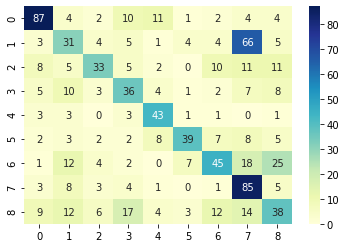

In [64]:
con_mat = confusion_matrix(y_valid, per_pred)
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='g',cmap="YlGnBu")
print(classification_report(y_valid, per_pred))

Why the Perceptron model is good for our data?

1. Perceptrons are versatile. They can be used to classify images of __different sizes and resolutions__. 
2. perceptrons have some specific advantages for weather image classification. For example, perceptrons can be used to classify images based on their __color, texture, and shape__. 

### Decision Trees

In [65]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_valid)

In [66]:
dtc_score = dtc.score(X_valid, y_valid)*100
print("Decision tree Algo Result : ", dtc_score)

Decision tree Algo Result :  45.39249146757679


              precision    recall  f1-score   support

         dew       0.58      0.49      0.53       125
     fogsmog       0.59      0.59      0.59       123
       glaze       0.36      0.39      0.38        85
        hail       0.32      0.36      0.34        76
   lightning       0.52      0.49      0.50        55
     rainbow       0.33      0.34      0.33        76
        rime       0.50      0.47      0.49       114
   sandstorm       0.51      0.55      0.53       110
      winter       0.32      0.32      0.32       115

    accuracy                           0.45       879
   macro avg       0.45      0.45      0.45       879
weighted avg       0.46      0.45      0.46       879



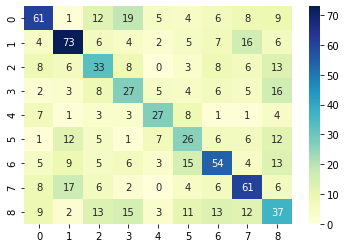

In [67]:
con_mat = confusion_matrix(y_valid, dtc_pred)
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='g',cmap="YlGnBu")
print(classification_report(y_valid, dtc_pred))

PCA

In [68]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train_PCA, y_train)
dtc_pred = dtc.predict(X_val_PCA)

In [69]:
dtc_score_PCA = dtc.score(X_val_PCA, y_valid)*100
print("Decision tree Algo with PCA Result : ", dtc_score_PCA)

Decision tree Algo with PCA Result :  46.41638225255973


              precision    recall  f1-score   support

         dew       0.68      0.54      0.60       125
     fogsmog       0.52      0.61      0.56       123
       glaze       0.43      0.46      0.45        85
        hail       0.36      0.38      0.37        76
   lightning       0.34      0.47      0.39        55
     rainbow       0.33      0.34      0.34        76
        rime       0.42      0.37      0.39       114
   sandstorm       0.57      0.66      0.61       110
      winter       0.37      0.27      0.31       115

    accuracy                           0.46       879
   macro avg       0.45      0.46      0.45       879
weighted avg       0.47      0.46      0.46       879



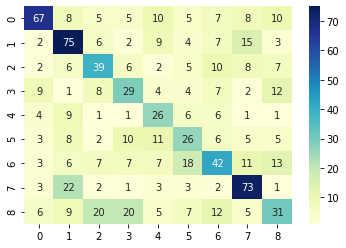

In [70]:
con_mat = confusion_matrix(y_valid, dtc_pred)
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='g',cmap="YlGnBu")
print(classification_report(y_valid, dtc_pred))

Why DecisionTree model is weak for our data?

1. Lack of information: Decision trees make decisions based on __individual features, without considering the spatial arrangement of those features__. 

2. High-dimensional data: images typically have high-dimensional data for example colors dimensions or pixels. __Decision trees may struggle to handle such high-dimensional data effectively.__ 

3. Limited modeling capability: Decision trees have __limited modeling capability__ compared to more complex models like deep neural networks. They may struggle to learn complax and nonlinear problems.

In [71]:
score_list = [knn_score,knn_score_PCA,svm_score,svm_score,adac_score,adac_score_PCA,per_score,per_score_PCA,dtc_score,dtc_score_PCA]
score_df = pd.DataFrame(score_list, index = ['knn score','knn score PCA','svm score','svm score PCA','adac score','adac score PCA','perceptron score','perceptron score PCA','decision tree score','decision tree score PCA'], columns = ['score'])
score_df

,score
knn score,44.823663
knn score PCA,47.895336
svm score,67.804323
svm score PCA,67.804323
adac score,56.200228
adac score PCA,58.361775
perceptron score,68.430034
perceptron score PCA,76.426134
decision tree score,45.392491
decision tree score PCA,46.416382


As we can see most of the models gave better results without using PCA, we assume that the reason to that is that by using the PCA method we lose a lot of important data.